## 1. Importing the dataset

### 1.1. Download from Kaggle

In [1]:
%pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 803.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77716 sha256=708da48081bb2d41ba08c67cc456c0d1dbe07665acf4311f6f380950beec4867
  Stored in directory: /home/codespace/.cache/pip/wheels/f3/16/ff/34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no

In [9]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
import pandas

In [47]:
# od.download("https://www.kaggle.com/datasets/omagarwal2411/nor-smart-speech")

In [48]:
od.download("https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-song-audio")

100%|██████████| 456M/456M [00:04<00:00, 119MB/s]  


### 1.2. Load the dataset

In [2]:
import os
import IPython

In [4]:
os.listdir(path="/workspaces/aps360-winter2023/nor-smart-speech")

def getListOfFiles(dirName):
    listOfFiles = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFiles:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

In [6]:
dirName = './nor-smart-speech'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

19486

In [7]:
print(listOfFiles[0])
IPython.display.Audio(listOfFiles[0])

./nor-smart-speech/happy/1017_MTI_HAP_XX.wav


### 1.2. Organizing RAVDESS SONG Audio dataset

In [43]:
#classify files to different emotions
subfolder2 = ["Actor_01", "Actor_02", "Actor_03", "Actor_04", "Actor_05", "Actor_06", "Actor_07", "Actor_08", "Actor_09", "Actor_10", "Actor_11", "Actor_12", "Actor_13", "Actor_14", "Actor_15", "Actor_16", "Actor_17", "Actor_19", "Actor_20", "Actor_21", "Actor_22", "Actor_23", "Actor_24"]

for item in subfolder2:
    directory = "./ravdess-emotional-song-audio/audio_song_actors_01-24/"+item

    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            #print(f)
            if (f.split('-')[-5] == '02') or (f.split('-')[-5] == '08'):
                os.remove(f)


In [44]:
#classify files to different emotions
subfolder2 = ["Actor_01", "Actor_02", "Actor_03", "Actor_04", "Actor_05", "Actor_06", "Actor_07", "Actor_08", "Actor_09", "Actor_10", "Actor_11", "Actor_12", "Actor_13", "Actor_14", "Actor_15", "Actor_16", "Actor_17", "Actor_19", "Actor_20", "Actor_21", "Actor_22", "Actor_23", "Actor_24"]

for item in subfolder2:
    directory = "./ravdess-emotional-song-audio/audio_song_actors_01-24/"+item

    for filename in os.listdir(directory):
        #print(filename)
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            print(f)
            if (f.split('-')[-5] == "01"): #move neutral files
                #print(f)
                os.rename(f, "./ravdess-song-data-emotion/neutral/"+filename)
                #print("done")

./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-04-01-02-02-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-05-01-02-01-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-06-01-02-02-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-04-02-02-02-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-03-02-02-01-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-03-02-01-02-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-03-01-01-02-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-06-01-01-01-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-05-01-01-01-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-05-01-02-02-01.wav
./ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_01/03-02-04-01-01-01-01.wav
./ravdess-emotional-s

In [10]:
subfolder = ["happy", "sad", "angry", "fear", "disgust", "neutral"]

#create subfolders for each emotion in new folder
for item in subfolder:
  if os.path.exists("./ravdess-song-data-emotion/"+item) is False:
    os.makedirs(os.path.join("ravdess-song-data-emotion", item))

In [45]:
for item in subfolder2:
    directory = "./ravdess-emotional-song-audio/audio_song_actors_01-24/"+item

    for filename in os.listdir(directory):
        #print(filename)
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            #print(f)
            if (f.split('-')[-5] == "03"): #move neutral files
                #print(f)
                os.rename(f, "./ravdess-song-data-emotion/happy/"+filename)
                #print("done")

            if (f.split('-')[-5] == "04"): #move neutral files
                #print(f)
                os.rename(f, "./ravdess-song-data-emotion/sad/"+filename)
                #print("done")

            if (f.split('-')[-5] == "05"): #move neutral files
                #print(f)
                os.rename(f, "./ravdess-song-data-emotion/angry/"+filename)
                #print("done")

            if (f.split('-')[-5] == "06"): #move neutral files
                #print(f)
                os.rename(f, "./ravdess-song-data-emotion/fear/"+filename)
                #print("done")

In [49]:
#move disgust files
subfolder2 = ["Actor_01", "Actor_02", "Actor_03", "Actor_04", "Actor_05", "Actor_06", "Actor_07", "Actor_08", "Actor_09", "Actor_10", "Actor_11", "Actor_12", "Actor_13", "Actor_14", "Actor_15", "Actor_16", "Actor_17", "Actor_19", "Actor_20", "Actor_21", "Actor_22", "Actor_23", "Actor_24"]

for item in subfolder2:
    directory = "./ravdess-emotional-song-audio/"+item

    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            #print(f)
            if (f.split('-')[-5] == '07'):
                print(f)
            #    os.remove(f)

## 2. Transforming audio into image

https://www.kaggle.com/code/timolee/audio-data-conversion-to-images-eda

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

### 2.1. Log Spectrogram Function

In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))

        
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)

    print(nperseg)
    print(noverlap)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

### 2.2. Convert and save image files

In [6]:
def saveImage(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """

    fig = plt.figure(figsize=figsize)    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    #print(samplerate)
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')
    

    # create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.imsave('%s.png' % output_file, spectrogram)

    plt.close()

In [6]:
#create new folder to store converted data
if os.path.exists("converted-data") is False:
    os.mkdir("converted-data")

subfolder = ["happy", "sad", "angry", "fear", "disgust", "neutral"]

#create subfolders for each emotion in new folder
for item in subfolder:
  if os.path.exists("./converted-data/"+item) is False:
    os.makedirs(os.path.join("converted-data", item))
    

In [7]:
#create new folder to store converted data - for NEW testing data
if os.path.exists("converted-data-kids-are-talking") is False:
    os.mkdir("converted-data-kids-are-talking")

subfolder = ["happy", "sad", "angry", "fear", "disgust", "neutral"]

#create subfolders for each emotion in new folder
for item in subfolder:
  if os.path.exists("./converted-data-kids-are-talking/"+item) is False:
    os.makedirs(os.path.join("converted-data-kids-are-talking", item))
    

In [5]:
#create new folder to store converted data - for NEW testing data
if os.path.exists("we-love-aps360") is False:
    os.mkdir("we-love-aps360")

subfolder = ["happy", "sad", "angry", "fear", "disgust", "neutral"]

#create subfolders for each emotion in new folder
for item in subfolder:
  if os.path.exists("./converted-data-we-love-aps360/"+item) is False:
    os.makedirs(os.path.join("converted-data-we-love-aps360", item))
    

In [7]:
#create new folder to store converted data - RAVDESS SONG AUDIO
if os.path.exists("converted-data-song-audio") is False:
    os.mkdir("converted-data-song-audio")

subfolder = ["happy", "sad", "angry", "fear", "disgust", "neutral"]

#create subfolders for each emotion in new folder
for item in subfolder:
  if os.path.exists("./converted-data-song-audio/"+item) is False:
    os.makedirs(os.path.join("converted-data-song-audio", item))

In [10]:
#convert images in 'happy' folder from NOR-smart-speech data set 
#one file manually removed from original dataset because it was empty

count = 0
pathHappy = ['./nor-smart-speech/happy/' + y for y in os.listdir('./nor-smart-speech/happy/')[:2000]]
for i, filepath in enumerate(pathHappy):
    print(filepath)
    saveImage(filepath, './converted-data/'+subfolder[0])
    count = count + 1

print(count)

./nor-smart-speech/happy/1017_MTI_HAP_XX.wav
./nor-smart-speech/happy/1069_IWL_HAP_XX.wav
./nor-smart-speech/happy/1041_IWL_HAP_XX.wav
./nor-smart-speech/happy/1053_WSI_HAP_XX.wav
./nor-smart-speech/happy/03-01-03-01-01-61-02-02-02-02.wav
./nor-smart-speech/happy/03-02-03-021-10-39-03-01-00-13.wav
./nor-smart-speech/happy/1051_ITS_HAP_XX.wav
./nor-smart-speech/happy/03-01-03-02-01-01-03.wav
./nor-smart-speech/happy/03-02-03-01-83-30-02-01-00-13.wav
./nor-smart-speech/happy/03-02-03-01-29-59-02-02-02-13.wav
./nor-smart-speech/happy/03-02-03-01-93-39-03-01-00-13.wav
./nor-smart-speech/happy/03-01-03-01-42-122-02-02-02-13.wav
./nor-smart-speech/happy/1029_MTI_HAP_XX.wav
./nor-smart-speech/happy/03-02-03-01-35-62-02-02-02-13-14.wav
./nor-smart-speech/happy/YAF_five_happy.wav
./nor-smart-speech/happy/03-01-03-01-02-76-02-02-02.wav
./nor-smart-speech/happy/1002_WSI_HAP_XX.wav
./nor-smart-speech/happy/1023_DFA_HAP_XX.wav
./nor-smart-speech/happy/1043_IOM_HAP_XX.wav
./nor-smart-speech/happy/OA

In [11]:
pathHappy = ['./nor-smart-speech/happy/' + y for y in os.listdir('./nor-smart-speech/happy/')[2000:]]
for i, filepath in enumerate(pathHappy):
    print(filepath)
    saveImage(filepath, './converted-data/'+subfolder[0])
    count = count + 1

print(count)

./nor-smart-speech/happy/1016_IOM_HAP_XX.wav
./nor-smart-speech/happy/03-02-03-01-20-62-02-02-13-01.wav
./nor-smart-speech/happy/03-02-03-01-32-62-02-02-02-13-04.wav
./nor-smart-speech/happy/1076_IEO_HAP_MD.wav
./nor-smart-speech/happy/03-02-03-01-43-62-02-02-02-13-01.wav
./nor-smart-speech/happy/1059_IEO_HAP_LO.wav
./nor-smart-speech/happy/OAF_check_happy.wav
./nor-smart-speech/happy/1073_ITS_HAP_XX.wav
./nor-smart-speech/happy/03-02-03-01-88-58-02-02-03-13.wav
./nor-smart-speech/happy/03-01-03-01-31-09-02-03-01-77.wav
./nor-smart-speech/happy/03-01-03-02-02-02-03.wav
./nor-smart-speech/happy/03-02-03-01-47-21-02-01-00.wav
./nor-smart-speech/happy/1048_IWW_HAP_XX.wav
./nor-smart-speech/happy/JE_h15.wav
./nor-smart-speech/happy/03-02-03-01-00-12-02-03-01-33.wav
./nor-smart-speech/happy/1041_IEO_HAP_HI.wav
./nor-smart-speech/happy/1069_ITH_HAP_XX.wav
./nor-smart-speech/happy/03-01-03-01-10-00-02-03-01-02-77.wav
./nor-smart-speech/happy/03-02-03-01-58-30-02-01-00-13.wav
./nor-smart-speec

: 

In [7]:
#convert images in 'sad' folder from NOR-smart-speech data set 
#deleted 2 empty files manually

count = 0
pathSad = ['./nor-smart-speech/sad/' + y for y in os.listdir('./nor-smart-speech/sad/')[1900:]]
for i, filepath in enumerate(pathSad):
    if os.path.exists("./converted-data"+subfolder[1]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data/'+subfolder[1])
        count = count + 1

print(count)

./nor-smart-speech/sad/03-01-04-02-11-33-02-03-01-05.wav
./nor-smart-speech/sad/1080_IEO_SAD_MD.wav
./nor-smart-speech/sad/YAF_pool_sad.wav
./nor-smart-speech/sad/1074_IEO_SAD_LO.wav
./nor-smart-speech/sad/03-01-04-01-05-33-02-03-01-01.wav
./nor-smart-speech/sad/1078_IWL_SAD_XX.wav
./nor-smart-speech/sad/03-01-04-01-01-09-02-03-01.wav
./nor-smart-speech/sad/1021_MTI_SAD_XX.wav
./nor-smart-speech/sad/1068_IEO_SAD_LO.wav
./nor-smart-speech/sad/03-02-04-01-02-23-02-01-00-14-07.wav
./nor-smart-speech/sad/OAF_wife_sad.wav
./nor-smart-speech/sad/1063_TAI_SAD_XX.wav
./nor-smart-speech/sad/03-01-04-01-01-18-02-03-01-02.wav
./nor-smart-speech/sad/03-02-04-01-44-47-02-01-00-14-05.wav
./nor-smart-speech/sad/OAF_raise_sad.wav
./nor-smart-speech/sad/YAF_chain_sad.wav
./nor-smart-speech/sad/03-01-04-01-01-01-02-03-01.wav
./nor-smart-speech/sad/03-02-04-01-12-105-02-03-00-14-02.wav
./nor-smart-speech/sad/1046_IEO_SAD_MD.wav
./nor-smart-speech/sad/03-02-04-01-04-25-02-01-00-14.wav
./nor-smart-speech/s

In [19]:
print(count)
print(pathSad[570])

570
./nor-smart-speech/sad/03-01-04-01-01-65-02-02-02.wav


In [7]:
#convert images in 'angry' folder from NOR-smart-speech data set 

count = 0
pathAngry = ['./nor-smart-speech/angry/' + y for y in os.listdir('./nor-smart-speech/angry/')]
for i, filepath in enumerate(pathAngry):
    if os.path.exists("./converted-data"+subfolder[2]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data/'+subfolder[2])
        count = count + 1

print(count)

./nor-smart-speech/angry/03-01-05-02-06-96-02-02-01-35.wav
./nor-smart-speech/angry/03-01-05-01-01-01-05.wav
./nor-smart-speech/angry/1081_ITS_ANG_XX.wav
./nor-smart-speech/angry/1059_MTI_ANG_XX.wav
./nor-smart-speech/angry/03-01-05-01-04-01-02-03-01.wav
./nor-smart-speech/angry/03-01-05-02-03-17-02-03-01.wav
./nor-smart-speech/angry/1079_WSI_ANG_XX.wav
./nor-smart-speech/angry/1028_TIE_ANG_XX.wav
./nor-smart-speech/angry/03-01-05-01-01-02-15.wav
./nor-smart-speech/angry/03-01-05-01-13-19-02-03-01.wav
./nor-smart-speech/angry/03-02-05-01-21-57-02-02-02.wav
./nor-smart-speech/angry/1040_IWW_ANG_XX.wav
./nor-smart-speech/angry/03-01-05-01-27-60-02-02-02-10.wav
./nor-smart-speech/angry/03-01-05-01-02-02-15.wav
./nor-smart-speech/angry/1090_WSI_ANG_XX.wav
./nor-smart-speech/angry/03-02-05-01-25-87-02-02-02-15.wav
./nor-smart-speech/angry/1088_IEO_ANG_MD.wav
./nor-smart-speech/angry/YAF_goal_angry.wav
./nor-smart-speech/angry/03-01-05-01-55-60-02-02-04-15-04.wav
./nor-smart-speech/angry/104

: 

: 

In [9]:
#convert images in 'fear' folder from NOR-smart-speech data set 

count = 0
pathFear = ['./nor-smart-speech/fear/' + y for y in os.listdir('./nor-smart-speech/fear/')[2478:]]
for i, filepath in enumerate(pathFear):
    print(filepath)
    saveImage(filepath, './converted-data/'+subfolder[3])
    count = count + 1

print(count)

./nor-smart-speech/fear/03-02-06-01-23-114-02-02-02-16.wav
./nor-smart-speech/fear/03-02-06-01-72-102-02-01-00-16.wav
./nor-smart-speech/fear/1029_DFA_FEA_XX.wav
./nor-smart-speech/fear/1089_WSI_FEA_XX.wav
./nor-smart-speech/fear/1049_IWW_FEA_XX.wav
./nor-smart-speech/fear/1010_ITH_FEA_XX.wav
./nor-smart-speech/fear/1053_ITS_FEA_XX.wav
./nor-smart-speech/fear/1026_IEO_FEA_HI.wav
./nor-smart-speech/fear/YAF_wire_fear.wav
./nor-smart-speech/fear/1032_IWW_FEA_XX.wav
./nor-smart-speech/fear/03-01-06-01-15-62-02-02-02-01.wav
./nor-smart-speech/fear/YAF_vote_fear.wav
./nor-smart-speech/fear/03-02-06-01-42-59-02-02-02-11.wav
./nor-smart-speech/fear/03-02-06-02-95-39-03-01-00-16-05.wav
./nor-smart-speech/fear/1063_IEO_FEA_HI.wav
./nor-smart-speech/fear/1073_IEO_FEA_LO.wav
./nor-smart-speech/fear/1001_DFA_FEA_XX.wav
./nor-smart-speech/fear/YAF_beg_fear.wav
./nor-smart-speech/fear/03-02-06-02-10-118-02-02-02-66.wav
./nor-smart-speech/fear/YAF_bar_fear.wav
./nor-smart-speech/fear/03-02-06-02-01-7

In [9]:
#convert images in 'disgust' folder from NOR-smart-speech data set 

count = 0
pathDisgust = ['./nor-smart-speech/disgust/' + y for y in os.listdir('./nor-smart-speech/disgust/')[2000:]]
for i, filepath in enumerate(pathDisgust):
    if os.path.exists("./converted-data"+subfolder[4]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data/'+subfolder[4])
        count = count + 1

print(count)

./nor-smart-speech/disgust/03-02-07-01-16-82-02-02-02-17.wav
./nor-smart-speech/disgust/YAF_gas_disgust.wav
./nor-smart-speech/disgust/OAF_deep_disgust.wav
./nor-smart-speech/disgust/1089_MTI_DIS_XX.wav
./nor-smart-speech/disgust/1089_IEO_DIS_MD.wav
./nor-smart-speech/disgust/JK_d05.wav
./nor-smart-speech/disgust/03-02-07-01-24-86-02-02-02-17.wav
./nor-smart-speech/disgust/03-01-07-01-28-53-02-02-02.wav
./nor-smart-speech/disgust/1080_ITH_DIS_XX.wav
./nor-smart-speech/disgust/03-02-07-01-22-100-02-01-00-17.wav
./nor-smart-speech/disgust/1037_DFA_DIS_XX.wav
./nor-smart-speech/disgust/1031_DFA_DIS_XX.wav
./nor-smart-speech/disgust/03-01-07-01-01-01-23.wav
./nor-smart-speech/disgust/03-02-07-01-18-104-02-02-02-17-66.wav
./nor-smart-speech/disgust/03-01-07-01-32-122-02-02-04-01.wav
./nor-smart-speech/disgust/1038_TAI_DIS_XX.wav
./nor-smart-speech/disgust/1037_IWL_DIS_XX.wav
./nor-smart-speech/disgust/1069_IOM_DIS_XX.wav
./nor-smart-speech/disgust/1030_ITH_DIS_XX.wav
./nor-smart-speech/disg

In [13]:
#convert images in 'neutral' folder from NOR-smart-speech data set 
#one file manually deleted

count = 0
pathNeutral = ['./nor-smart-speech/neutral/' + y for y in os.listdir('./nor-smart-speech/neutral/')[1350:]]
for i, filepath in enumerate(pathNeutral):
    if os.path.exists("./converted-data"+subfolder[5]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data/'+subfolder[5])
        count = count + 1

print(count)

./nor-smart-speech/neutral/1070_TAI_NEU_XX.wav
./nor-smart-speech/neutral/1014_IWL_NEU_XX.wav
./nor-smart-speech/neutral/1078_IEO_NEU_XX.wav
./nor-smart-speech/neutral/03-01-02-01-11-69-02-02-02.wav
./nor-smart-speech/neutral/03-01-01-01-01-01-24.wav
./nor-smart-speech/neutral/1045_TAI_NEU_XX.wav
./nor-smart-speech/neutral/03-01-02-01-28-60-02-02-02-02.wav
./nor-smart-speech/neutral/03-02-02-01-01-118-02-02-02-01.wav
./nor-smart-speech/neutral/03-01-01-01-01-01-15.wav
./nor-smart-speech/neutral/03-01-02-01-20-58-02-02-03.wav
./nor-smart-speech/neutral/03-01-02-01-10-40-02-01-02.wav
./nor-smart-speech/neutral/OAF_rough_neutral.wav
./nor-smart-speech/neutral/1074_ITS_NEU_XX.wav
./nor-smart-speech/neutral/03-01-02-01-20-118-02-02-02-01.wav
./nor-smart-speech/neutral/YAF_hire_neutral.wav
./nor-smart-speech/neutral/03-01-01-01-02-01-09.wav
./nor-smart-speech/neutral/03-02-02-01-04-99-02-02-01-32.wav
./nor-smart-speech/neutral/03-01-02-01-05-103-02-02-02-66.wav
./nor-smart-speech/neutral/102

: 

In [12]:
print(count)
print(pathNeutral[count])

1375
./nor-smart-speech/neutral/03-02-02-01-01-65-02-02-02.wav


## 2b. Converting NEW Collected Testing Data

In [ ]:
#happy - kids are talking
pathHappy2 = ['./Kids-are-talking-by-the-door/happy/' + y for y in os.listdir('./Kids-are-talking-by-the-door/happy/')]
for i, filepath in enumerate(pathHappy2):
    print(filepath)
    saveImage(filepath, './converted-data-kids-are-talking/'+subfolder[0])

In [45]:
#sad - kids are talking
pathSad2 = ['./Kids-are-talking-by-the-door/sad/' + y for y in os.listdir('./Kids-are-talking-by-the-door/sad/')]
for i, filepath in enumerate(pathSad2):
    print(filepath)
    saveImage(filepath, './converted-data-kids-are-talking/'+subfolder[1])

./Kids-are-talking-by-the-door/sad/1-sad-04.wav
882
441
./Kids-are-talking-by-the-door/sad/1-sad-02.wav
960
480
./Kids-are-talking-by-the-door/sad/1-sad-01.wav
960
480


In [ ]:
#angry - kids are talking
pathAngry2 = ['./Kids-are-talking-by-the-door/angry/' + y for y in os.listdir('./Kids-are-talking-by-the-door/angry/')]
for i, filepath in enumerate(pathAngry2):
    print(filepath)
    saveImage(filepath, './converted-data-kids-are-talking/'+subfolder[2])

In [23]:
#fear - kids are talking
pathFear2 = ['./Kids-are-talking-by-the-door/fear/' + y for y in os.listdir('./Kids-are-talking-by-the-door/fear/')]
for i, filepath in enumerate(pathFear2):
    print(filepath)
    saveImage(filepath, './converted-data-kids-are-talking/'+subfolder[3])

./Kids-are-talking-by-the-door/fear/1-fear-04.wav
44100
./Kids-are-talking-by-the-door/fear/1-fear-02.wav
48000
./Kids-are-talking-by-the-door/fear/1-fear-01.wav
48000


In [24]:
#disgust - kids are talking
pathDisgust2 = ['./Kids-are-talking-by-the-door/disgust/' + y for y in os.listdir('./Kids-are-talking-by-the-door/disgust/')]
for i, filepath in enumerate(pathAngry2):
    print(filepath)
    saveImage(filepath, './converted-data-kids-are-talking/'+subfolder[4])

./Kids-are-talking-by-the-door/disgust/1-disgust-02.wav
48000
./Kids-are-talking-by-the-door/disgust/1-disgust-01.wav
48000
./Kids-are-talking-by-the-door/disgust/1-disgust-04.wav
44100


In [10]:
#neutral - kids are talking
pathNeutral2 = ['./Kids-are-talking-by-the-door/neutral/' + y for y in os.listdir('./Kids-are-talking-by-the-door/neutral/')]
for i, filepath in enumerate(pathNeutral2):
    print(filepath)
    saveImage(filepath, './converted-data-kids-are-talking/'+subfolder[5])

./Kids-are-talking-by-the-door/neutral/1-neutral-02.wav
960
480
./Kids-are-talking-by-the-door/neutral/1-neutral-01.wav
960
480
./Kids-are-talking-by-the-door/neutral/1-neutral-04.wav
882
441
./Kids-are-talking-by-the-door/neutral/1-neutral-03.wav
960
480


In [ ]:
#happy - we love aps360
pathHappy3 = ['./we-love-aps360/happy/' + y for y in os.listdir('./we-love-aps360/happy/')]
for i, filepath in enumerate(pathHappy3):
    print(filepath)
    saveImage(filepath, './converted-data-we-love-aps360/'+subfolder[0])

In [ ]:
#sad - we love aps360
pathSad3 = ['./we-love-aps360/sad/' + y for y in os.listdir('./we-love-aps360/sad/')]
for i, filepath in enumerate(pathSad3):
    print(filepath)
    saveImage(filepath, './converted-data-we-love-aps360/'+subfolder[1])

In [16]:
#angry - we love aps360
pathAngry3 = ['./we-love-aps360/angry/' + y for y in os.listdir('./we-love-aps360/angry/')]
for i, filepath in enumerate(pathAngry3):
    print(filepath)
    saveImage(filepath, './converted-data-we-love-aps360/'+subfolder[2])

./we-love-aps360/angry/2-angry-04.wav
882
441


In [21]:
#fear - we love aps360
pathFear3 = ['./we-love-aps360/fear/' + y for y in os.listdir('./we-love-aps360/fear/')]
for i, filepath in enumerate(pathFear3):
    print(filepath)
    saveImage(filepath, './converted-data-we-love-aps360/'+subfolder[3])

./we-love-aps360/fear/2-fear-03.wav
882
441


In [ ]:
#disgust - we love aps360
pathDisgust3 = ['./we-love-aps360/disgust/' + y for y in os.listdir('./we-love-aps360/disgust/')]
for i, filepath in enumerate(pathDisgust3):
    print(filepath)
    saveImage(filepath, './converted-data-we-love-aps360/'+subfolder[4])

In [ ]:
#neutral - we love aps360
pathNeutral3 = ['./we-love-aps360/neutral/' + y for y in os.listdir('./we-love-aps360/neutral/')]
for i, filepath in enumerate(pathNeutral3):
    print(filepath)
    saveImage(filepath, './converted-data-we-love-aps360/'+subfolder[5])

In [ ]:
subfolder = ["happy", "sad", "angry", "fear", "neutral","disgust"]


In [52]:
count = 0
pathHappy4 = ['./ravdess-song-data-emotion/happy/' + y for y in os.listdir('./ravdess-song-data-emotion/happy/')]
for i, filepath in enumerate(pathHappy4):
    if os.path.exists("./converted-data-song-audio"+subfolder[0]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data-song-audio/'+subfolder[0])
        count = count + 1

print(count)

./ravdess-song-data-emotion/happy/03-02-03-02-02-01-02.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-01-05.wav
960
480


/tmp/ipykernel_1810/73396309.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, test_sound  = wavfile.read(wav_path)


./ravdess-song-data-emotion/happy/03-02-03-01-02-01-19.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-01-02-03.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-02-02-10.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-01-16.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-01-15.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-01-01-13.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-02-03.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-02-02-24.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-01-02-23.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-02-01-14.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-01-01-02.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-01-02-04.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-01-02-14.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-01-01-09.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-02-22.wav
960

In [56]:
count = 0
pathSad4 = ['./ravdess-song-data-emotion/sad/' + y for y in os.listdir('./ravdess-song-data-emotion/sad/')]
for i, filepath in enumerate(pathHappy4):
    if os.path.exists("./converted-data-song-audio"+subfolder[1]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data-song-audio/'+subfolder[1])
        count = count + 1

print(count)

./ravdess-song-data-emotion/happy/03-02-03-02-02-01-02.wav
960
480


/tmp/ipykernel_1810/73396309.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, test_sound  = wavfile.read(wav_path)


./ravdess-song-data-emotion/happy/03-02-03-01-02-01-05.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-01-19.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-01-02-03.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-02-02-10.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-01-16.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-01-15.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-01-01-13.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-02-02-03.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-02-02-24.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-01-02-23.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-02-01-14.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-01-01-02.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-01-02-04.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-02-01-02-14.wav
960
480
./ravdess-song-data-emotion/happy/03-02-03-01-01-01-09.wav
960

In [57]:
count = 0
pathAngry4 = ['./ravdess-song-data-emotion/angry/' + y for y in os.listdir('./ravdess-song-data-emotion/angry/')]
for i, filepath in enumerate(pathAngry4):
    if os.path.exists("./converted-data-song-audio"+subfolder[2]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data-song-audio/'+subfolder[2])
        count = count + 1

print(count)

./ravdess-song-data-emotion/angry/03-02-05-02-01-02-20.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-02-01-19.wav
960
480


/tmp/ipykernel_1810/73396309.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, test_sound  = wavfile.read(wav_path)


./ravdess-song-data-emotion/angry/03-02-05-02-02-02-06.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-02-02-12.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-01-02-10.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-02-01-01-11.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-02-01-01.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-01-02-13.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-02-01-01-24.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-02-02-20.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-02-02-02-19.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-01-01-16.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-02-02-01-20.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-01-02-20.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-02-01-02-16.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-01-01-02-21.wav
960
480
./ravdess-song-data-emotion/angry/03-02-05-02-02-01-04.wav
960

In [58]:
count = 0
pathFear4 = ['./ravdess-song-data-emotion/fear/' + y for y in os.listdir('./ravdess-song-data-emotion/fear/')]
for i, filepath in enumerate(pathFear4):
    if os.path.exists("./converted-data-song-audio"+subfolder[3]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data-song-audio/'+subfolder[3])
        count = count + 1

print(count)

./ravdess-song-data-emotion/fear/03-02-06-02-02-01-07.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-02-02-01-22.wav
960
480


/tmp/ipykernel_1810/73396309.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, test_sound  = wavfile.read(wav_path)


./ravdess-song-data-emotion/fear/03-02-06-02-02-01-04.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-02-02-02-19.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-02-02-17.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-01-02-11.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-02-01-11.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-01-01-12.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-02-01-02-24.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-02-01-02-13.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-01-02-02.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-01-01-23.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-02-02-01.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-02-01-01-20.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-02-02-02-07.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-01-02-20.wav
960
480
./ravdess-song-data-emotion/fear/03-02-06-01-02-02-22.wav
960
480
./ravdess-

In [60]:
count = 0
pathNeutral4 = ['./ravdess-song-data-emotion/neutral/' + y for y in os.listdir('./ravdess-song-data-emotion/neutral/')]
for i, filepath in enumerate(pathNeutral4):
    if os.path.exists("./converted-data-song-audio"+subfolder[4]+"/"+filepath.split('/')[-1].split('.png')[0]) is False:
        print(filepath)
        saveImage(filepath, './converted-data-song-audio/'+subfolder[4])
        count = count + 1

print(count)

./ravdess-song-data-emotion/neutral/03-02-01-01-02-02-15.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-02-08.wav
960
480


/tmp/ipykernel_1810/73396309.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, test_sound  = wavfile.read(wav_path)


./ravdess-song-data-emotion/neutral/03-02-01-01-01-02-15.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-01-02.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-01-01-14.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-02-12.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-01-03.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-01-06.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-01-01-22.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-01-17.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-01-02-23.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-01-24.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-01-02-04.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-02-10.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-01-01-16.wav
960
480
./ravdess-song-data-emotion/neutral/03-02-01-01-02-01-09.wav
960
480
./ravdess-song-data-emotion/neutra

In [ ]:
pathDisgust4 = ['./ravdess-song-data-emotion/disgust/' + y for y in os.listdir('./ravdess-song-data-emotion/disgust/')]
for i, filepath in enumerate(pathNeutral4):
    if os.path.exists("./converted-data-song-audio"+subfolder[4]+"/"+filepath.split('/')[-1].split('.png')[4]) is False:
        print(filepath)
        saveImage(filepath, './converted-data-song-audio/'+subfolder[4])
        count = count + 1

print(count)

## 3. Visualizing the dataset

In [12]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [13]:
def plotSamples(samples):
    fig = plt.figure(figsize=(10,10))

    # for each of the samples
    for i, filepath in enumerate(samples[:9]):
        # Make subplots
        plt.subplot(3,3,i+1)
        
        # pull the labels
        label = filepath.split('/')[-2]
        plt.title(label)
        
        # create spectogram
        samplerate, test_sound  = wavfile.read(filepath)
        _, spectrogram = log_specgram(test_sound, samplerate)
        
        plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.axis('off')

In [14]:
def plotWaveforms(samples):
    fig = plt.figure(figsize=(8,20))
    for i, filepath in enumerate(samples[:9]):
        plt.subplot(9,1,i+1)
        samplerate, test_sound  = wavfile.read(filepath)
        plt.title(filepath.split('/')[-2])
        plt.axis('off')
        plt.plot(test_sound)

### 3.1. Angry samples

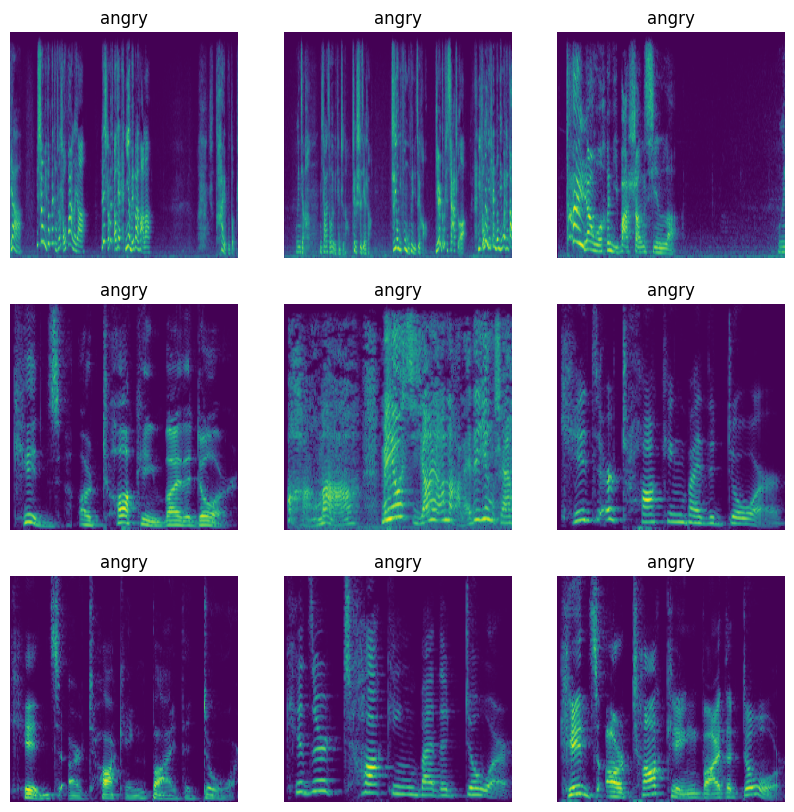

In [24]:
samples = ['nor-smart-speech/angry/' + y for y in os.listdir('nor-smart-speech/angry/')[:9]]
plotSamples(samples)

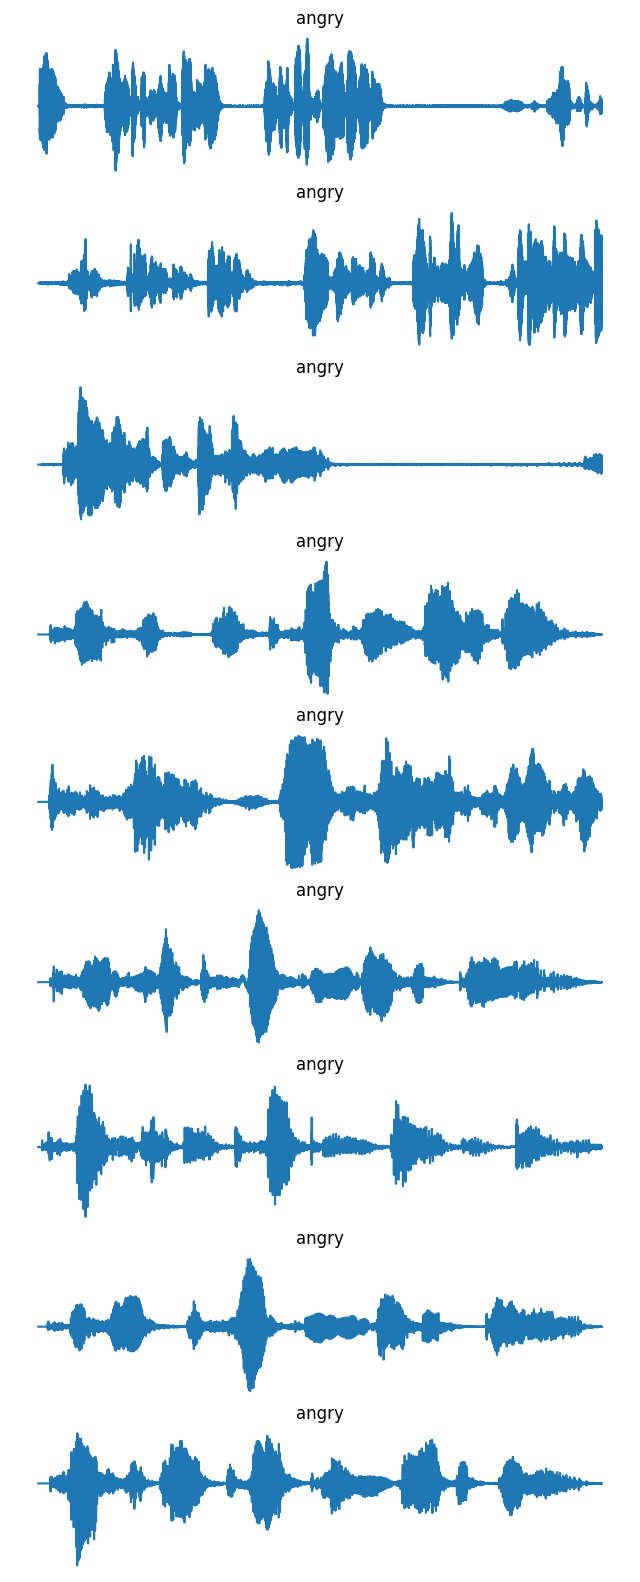

In [25]:
samples = ['nor-smart-speech/angry/' + y for y in os.listdir('nor-smart-speech/angry/')[:9]]
plotWaveforms(samples)

### 3.2. Disgust samples

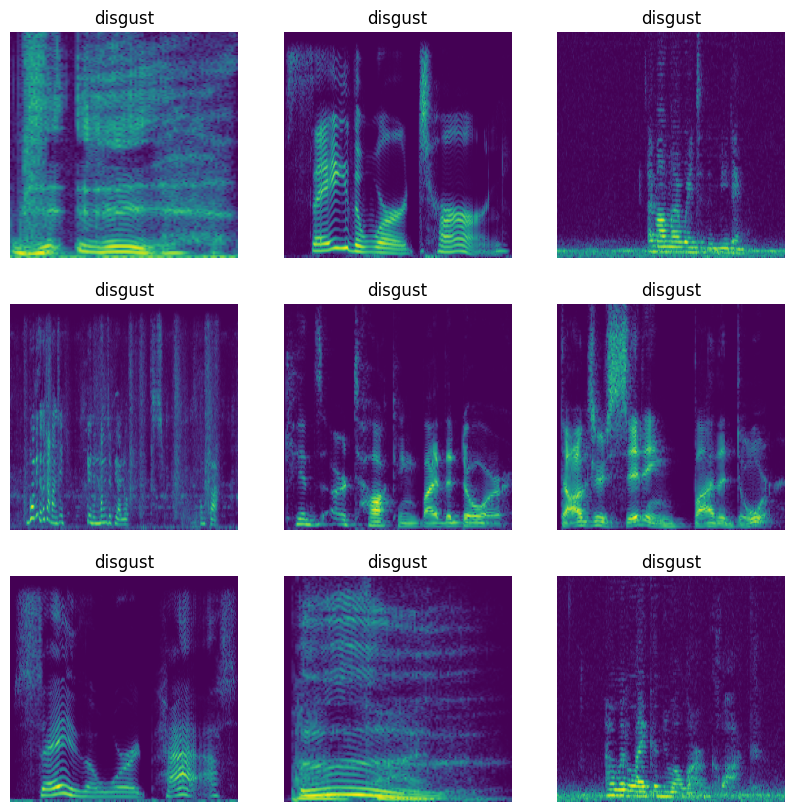

In [19]:
samples = ['./nor-smart-speech/disgust/' + y for y in os.listdir('./nor-smart-speech/disgust/')[:9]]
plotSamples(samples)

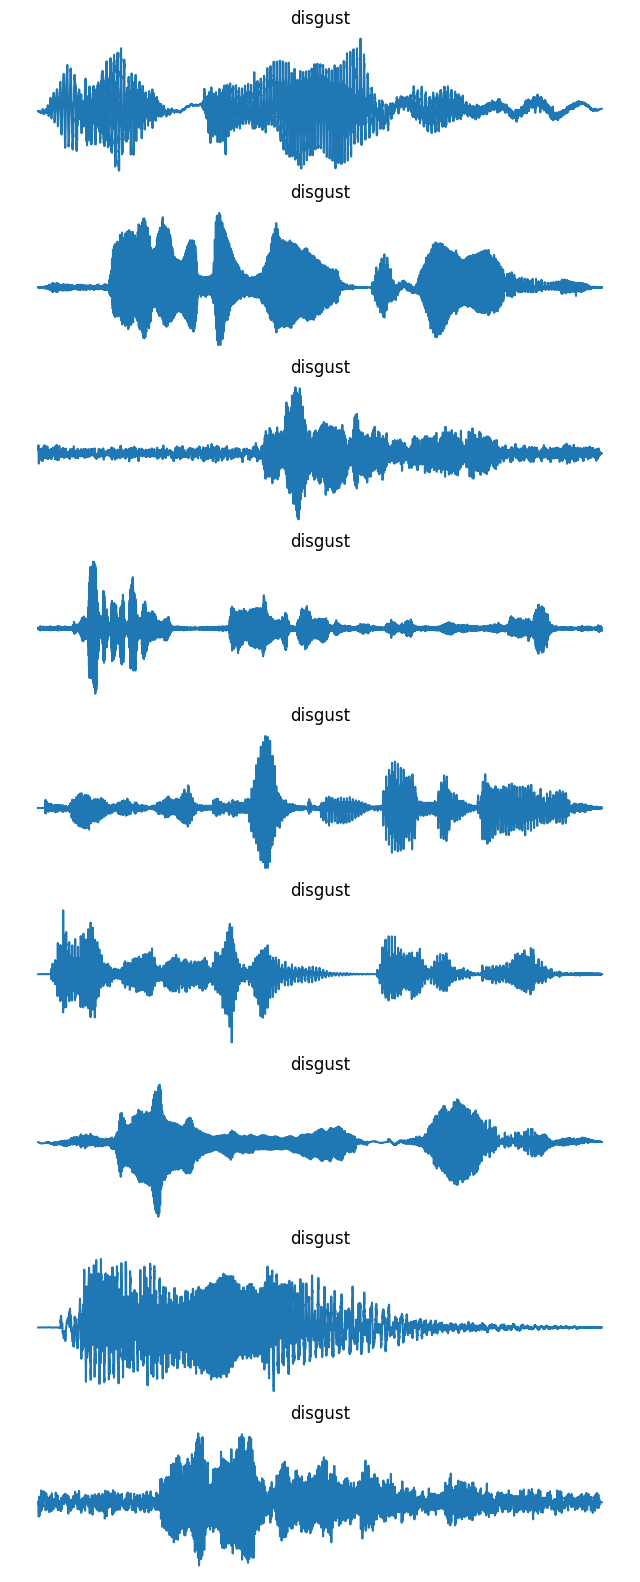

In [8]:
samples = ['./nor-smart-speech/disgust/' + y for y in os.listdir('./nor-smart-speech/disgust/')[:9]]
plotWaveforms(samples)

### 3.3. Fear

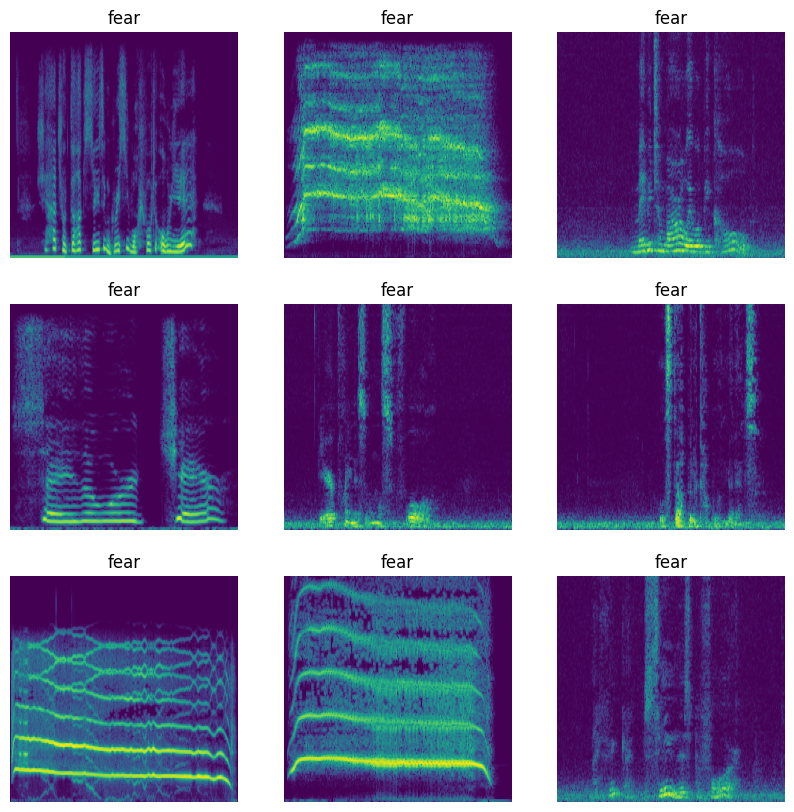

In [11]:
samples = ['./nor-smart-speech/fear/' + y for y in os.listdir('./nor-smart-speech/fear/')[:9]]
plotSamples(samples)

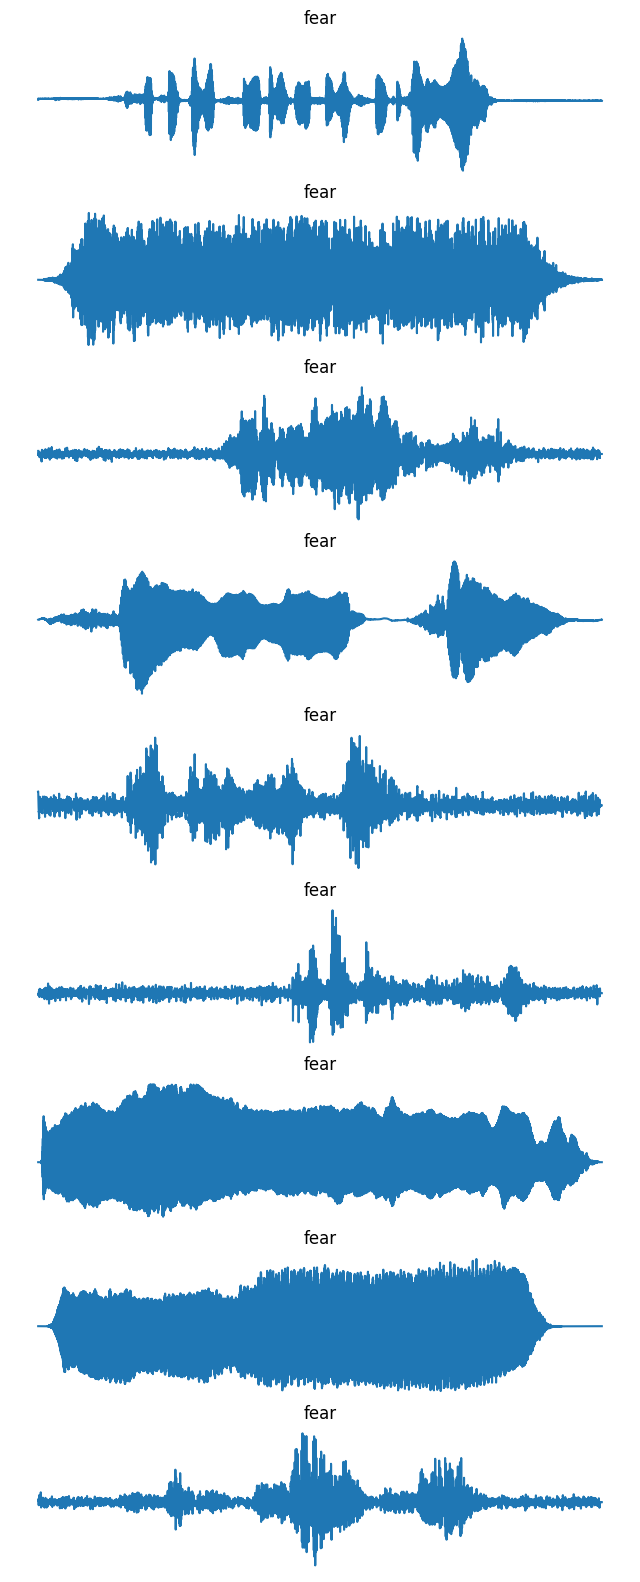

In [12]:
samples = ['./nor-smart-speech/fear/' + y for y in os.listdir('./nor-smart-speech/fear/')[:9]]
plotWaveforms(samples)

### 3.4. Happy

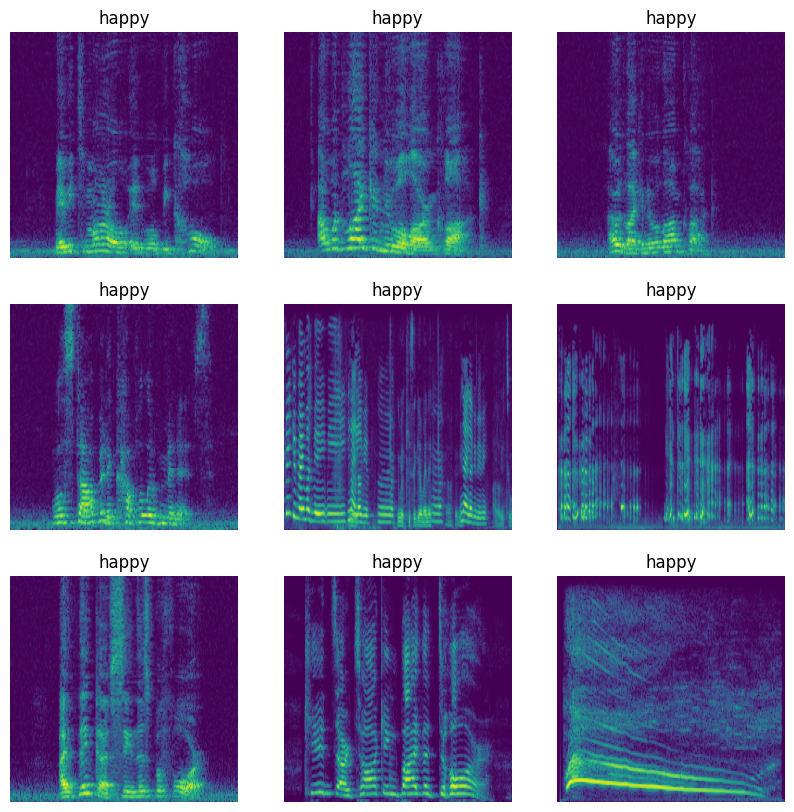

In [13]:
samples = ['./nor-smart-speech/happy/' + y for y in os.listdir('./nor-smart-speech/happy/')[:9]]
plotSamples(samples)

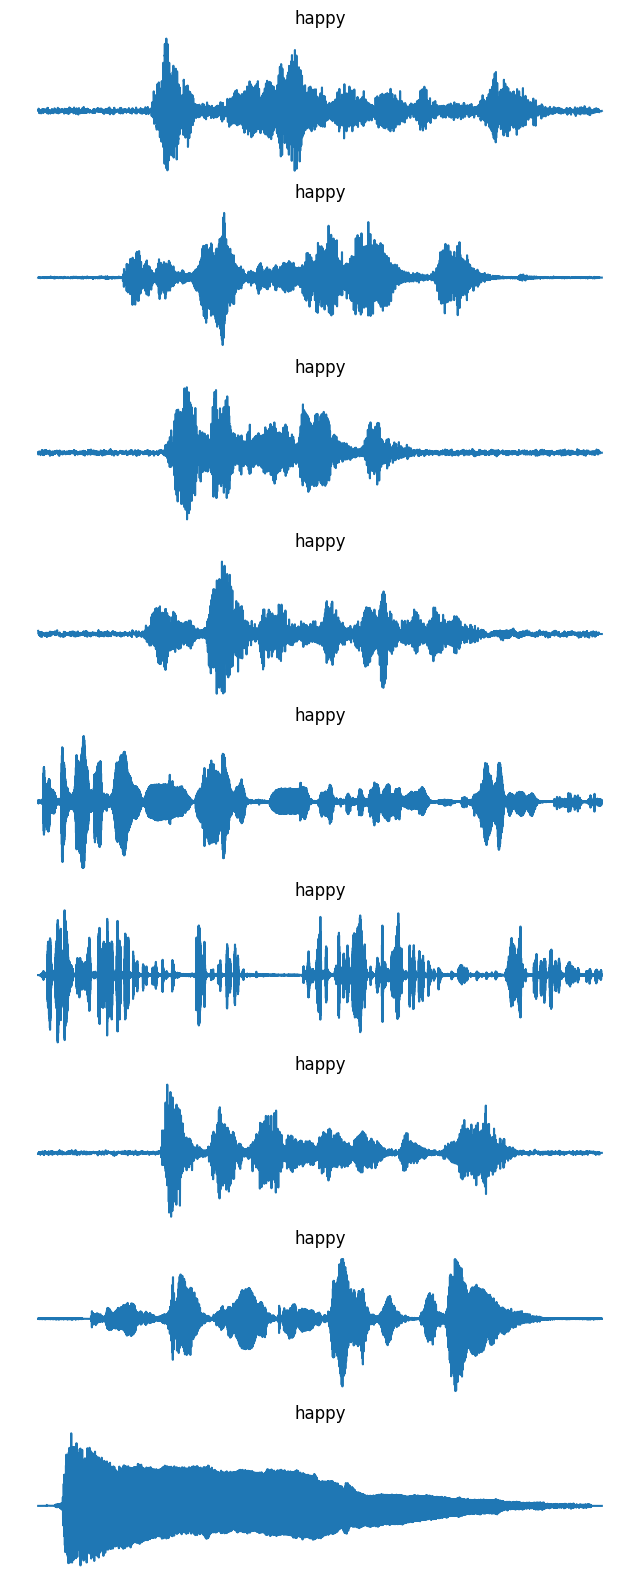

In [14]:
samples = ['./nor-smart-speech/happy/' + y for y in os.listdir('./nor-smart-speech/happy/')[:9]]
plotWaveforms(samples)

### 3.5. Neutral

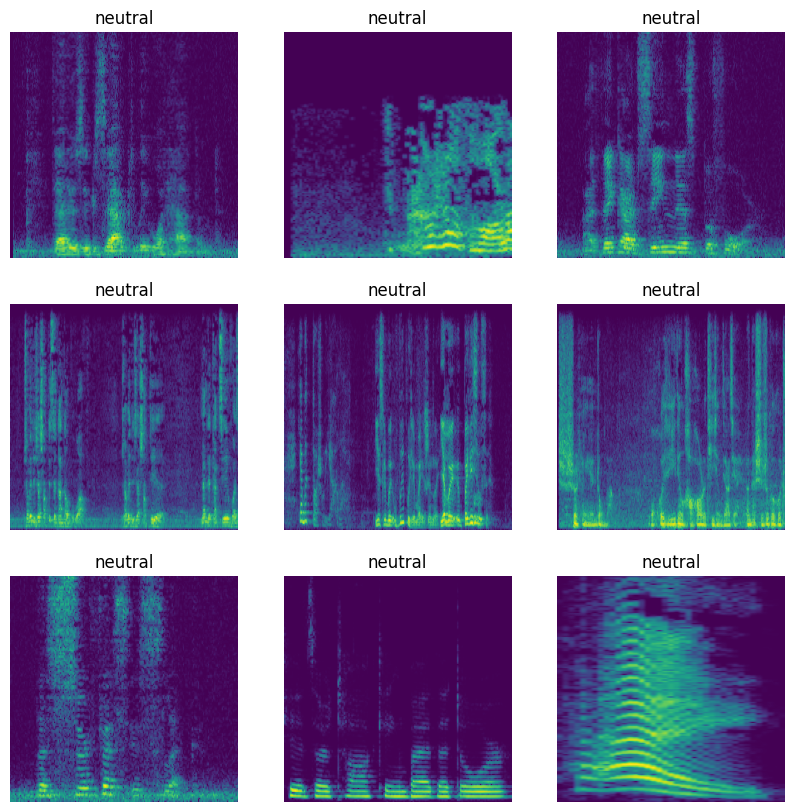

In [15]:
samples = ['./nor-smart-speech/neutral/' + y for y in os.listdir('./nor-smart-speech/neutral/')[:9]]
plotSamples(samples)

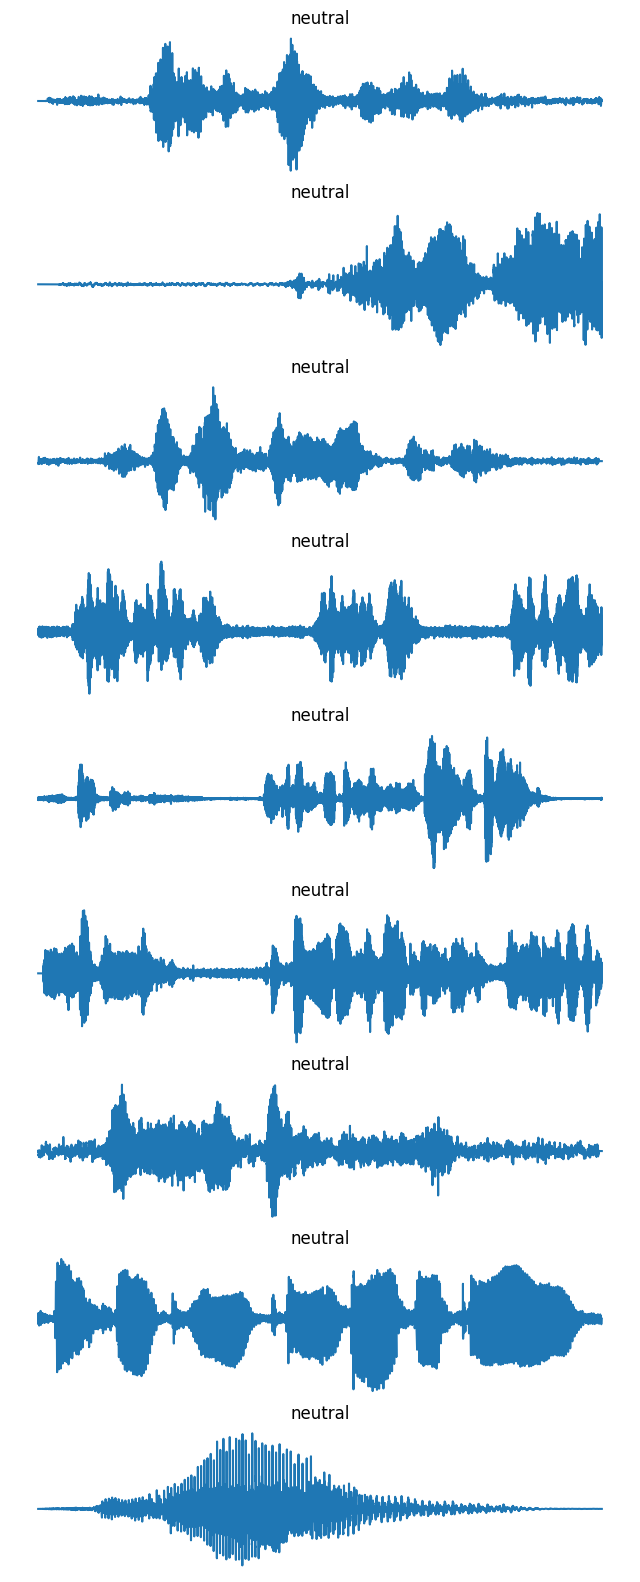

In [16]:
samples = ['./nor-smart-speech/neutral/' + y for y in os.listdir('./nor-smart-speech/neutral/')[:9]]
plotWaveforms(samples)

### 3.6. Sad

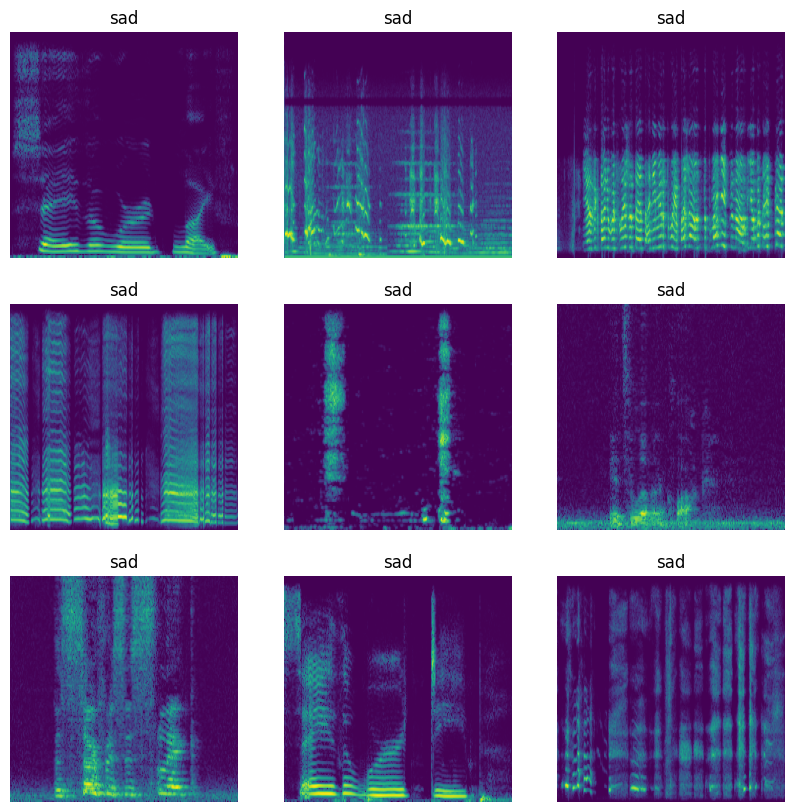

In [17]:
samples = ['./nor-smart-speech/sad/' + y for y in os.listdir('./nor-smart-speech/sad/')[:9]]
plotSamples(samples)

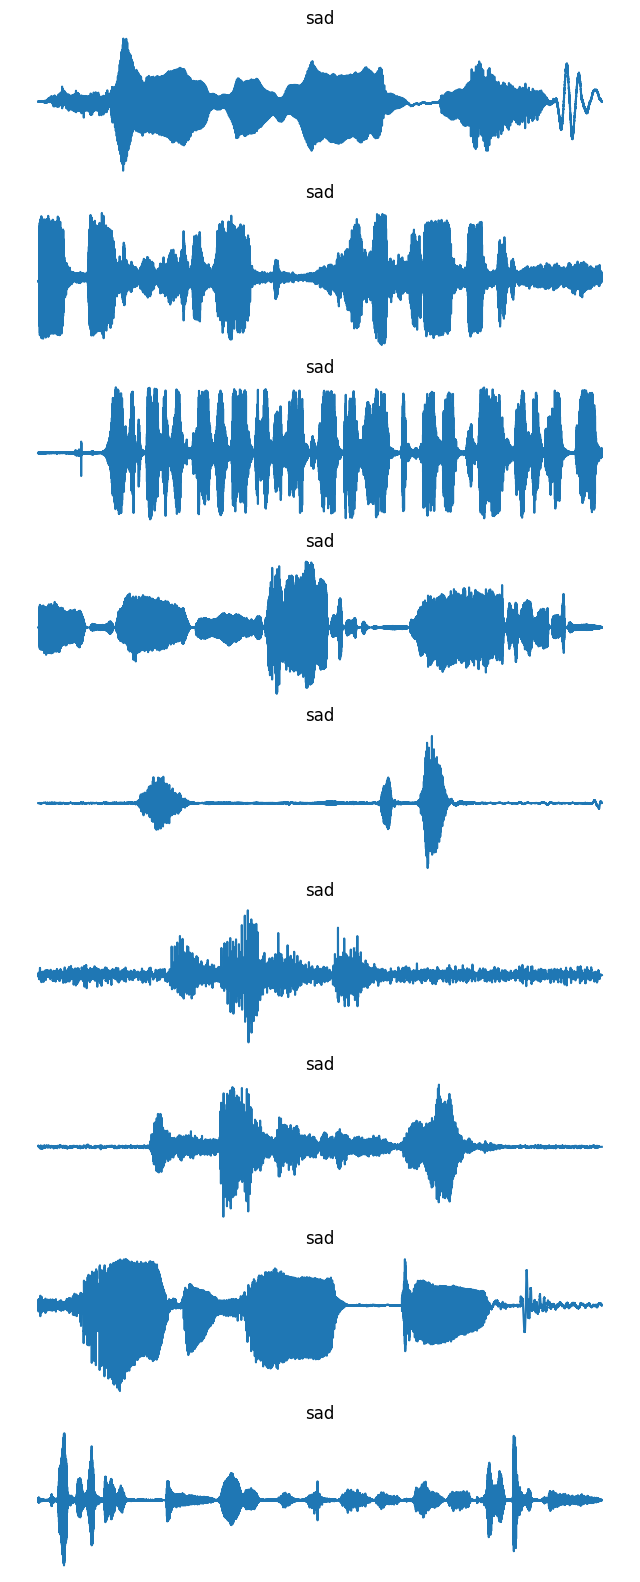

In [18]:
samples = ['./nor-smart-speech/sad/' + y for y in os.listdir('./nor-smart-speech/sad/')[:9]]
plotWaveforms(samples)